<h1 align='center'>BANK CUSTOMER CHURN PREDICTION USING ARTIFICIAL NEURAL NETWORK</h1>

Bank client churn prediction is to measure why customers are leaving a bank (as in closed their account). In this project we will be looking at customer churn in a bank and will build a deep learning model to predict the churn and metrics like precision,recall, f1-score are used to measure performance of the model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


### Imported the required libraries 

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

### Load Data from the Kaggle Dataset

In [3]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6662,6663,15614054,Pankhurst,665,France,Male,36,1,0.00,2,0,1,121505.61,0
594,595,15603925,Greco,779,Spain,Female,26,4,174318.13,2,0,1,38296.21,0
1904,1905,15677382,Miller,625,Spain,Female,69,1,107569.96,1,1,1,182336.45,0
1727,1728,15734491,Lombardo,676,Spain,Female,36,4,0.00,2,1,1,3173.31,0
7691,7692,15791045,Boni,568,France,Female,38,3,132951.92,1,0,1,124486.28,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Removed the unncessary columns from the dataframe like customerName, CustomerID, RowNumber etc.
df.drop('RowNumber', axis='columns', inplace=True)
df.drop('CustomerId', axis='columns', inplace=True)
df.drop('Surname', axis='columns', inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [9]:
# Check the unique values for each column in the dataframe
for col in df:
    print(f'{col}: {df[col].unique()}') 

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [10]:
# Check for the datatypes of each column
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### One Hot Encodig for the Geographic Locations

In [11]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [12]:
df1['Gender'].replace({'Female': 1,'Male': 0},inplace=True)

In [13]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

## Data Visualization

Text(0.5, 1.0, 'Correlation Map')

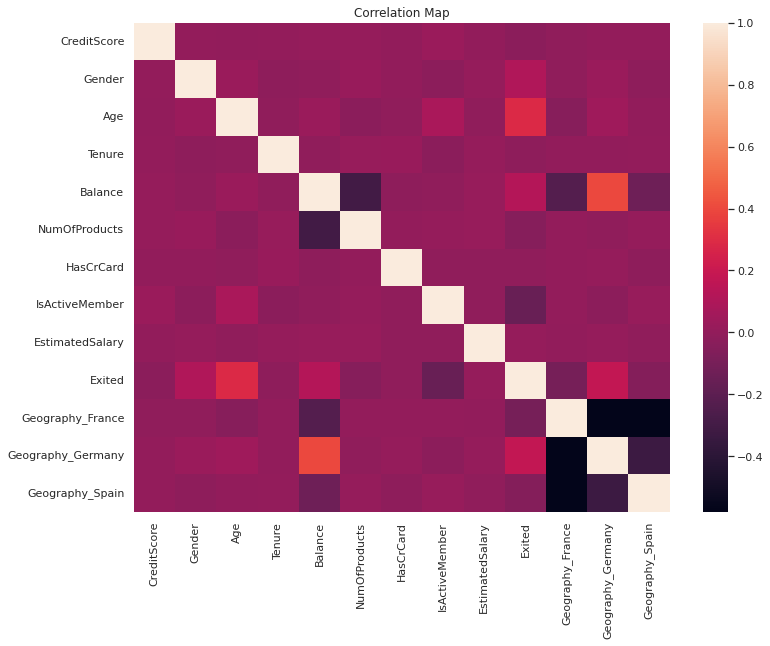

In [14]:
sns.set(rc = {'figure.figsize':(12,9)})
sns.heatmap(df1.corr()).set_title("Correlation Map")

- We can see from the above heat map that the age has a positive correlation with the Churn. 
- Whereas, IsActiveMember has a negative correlation with the people who have exited.

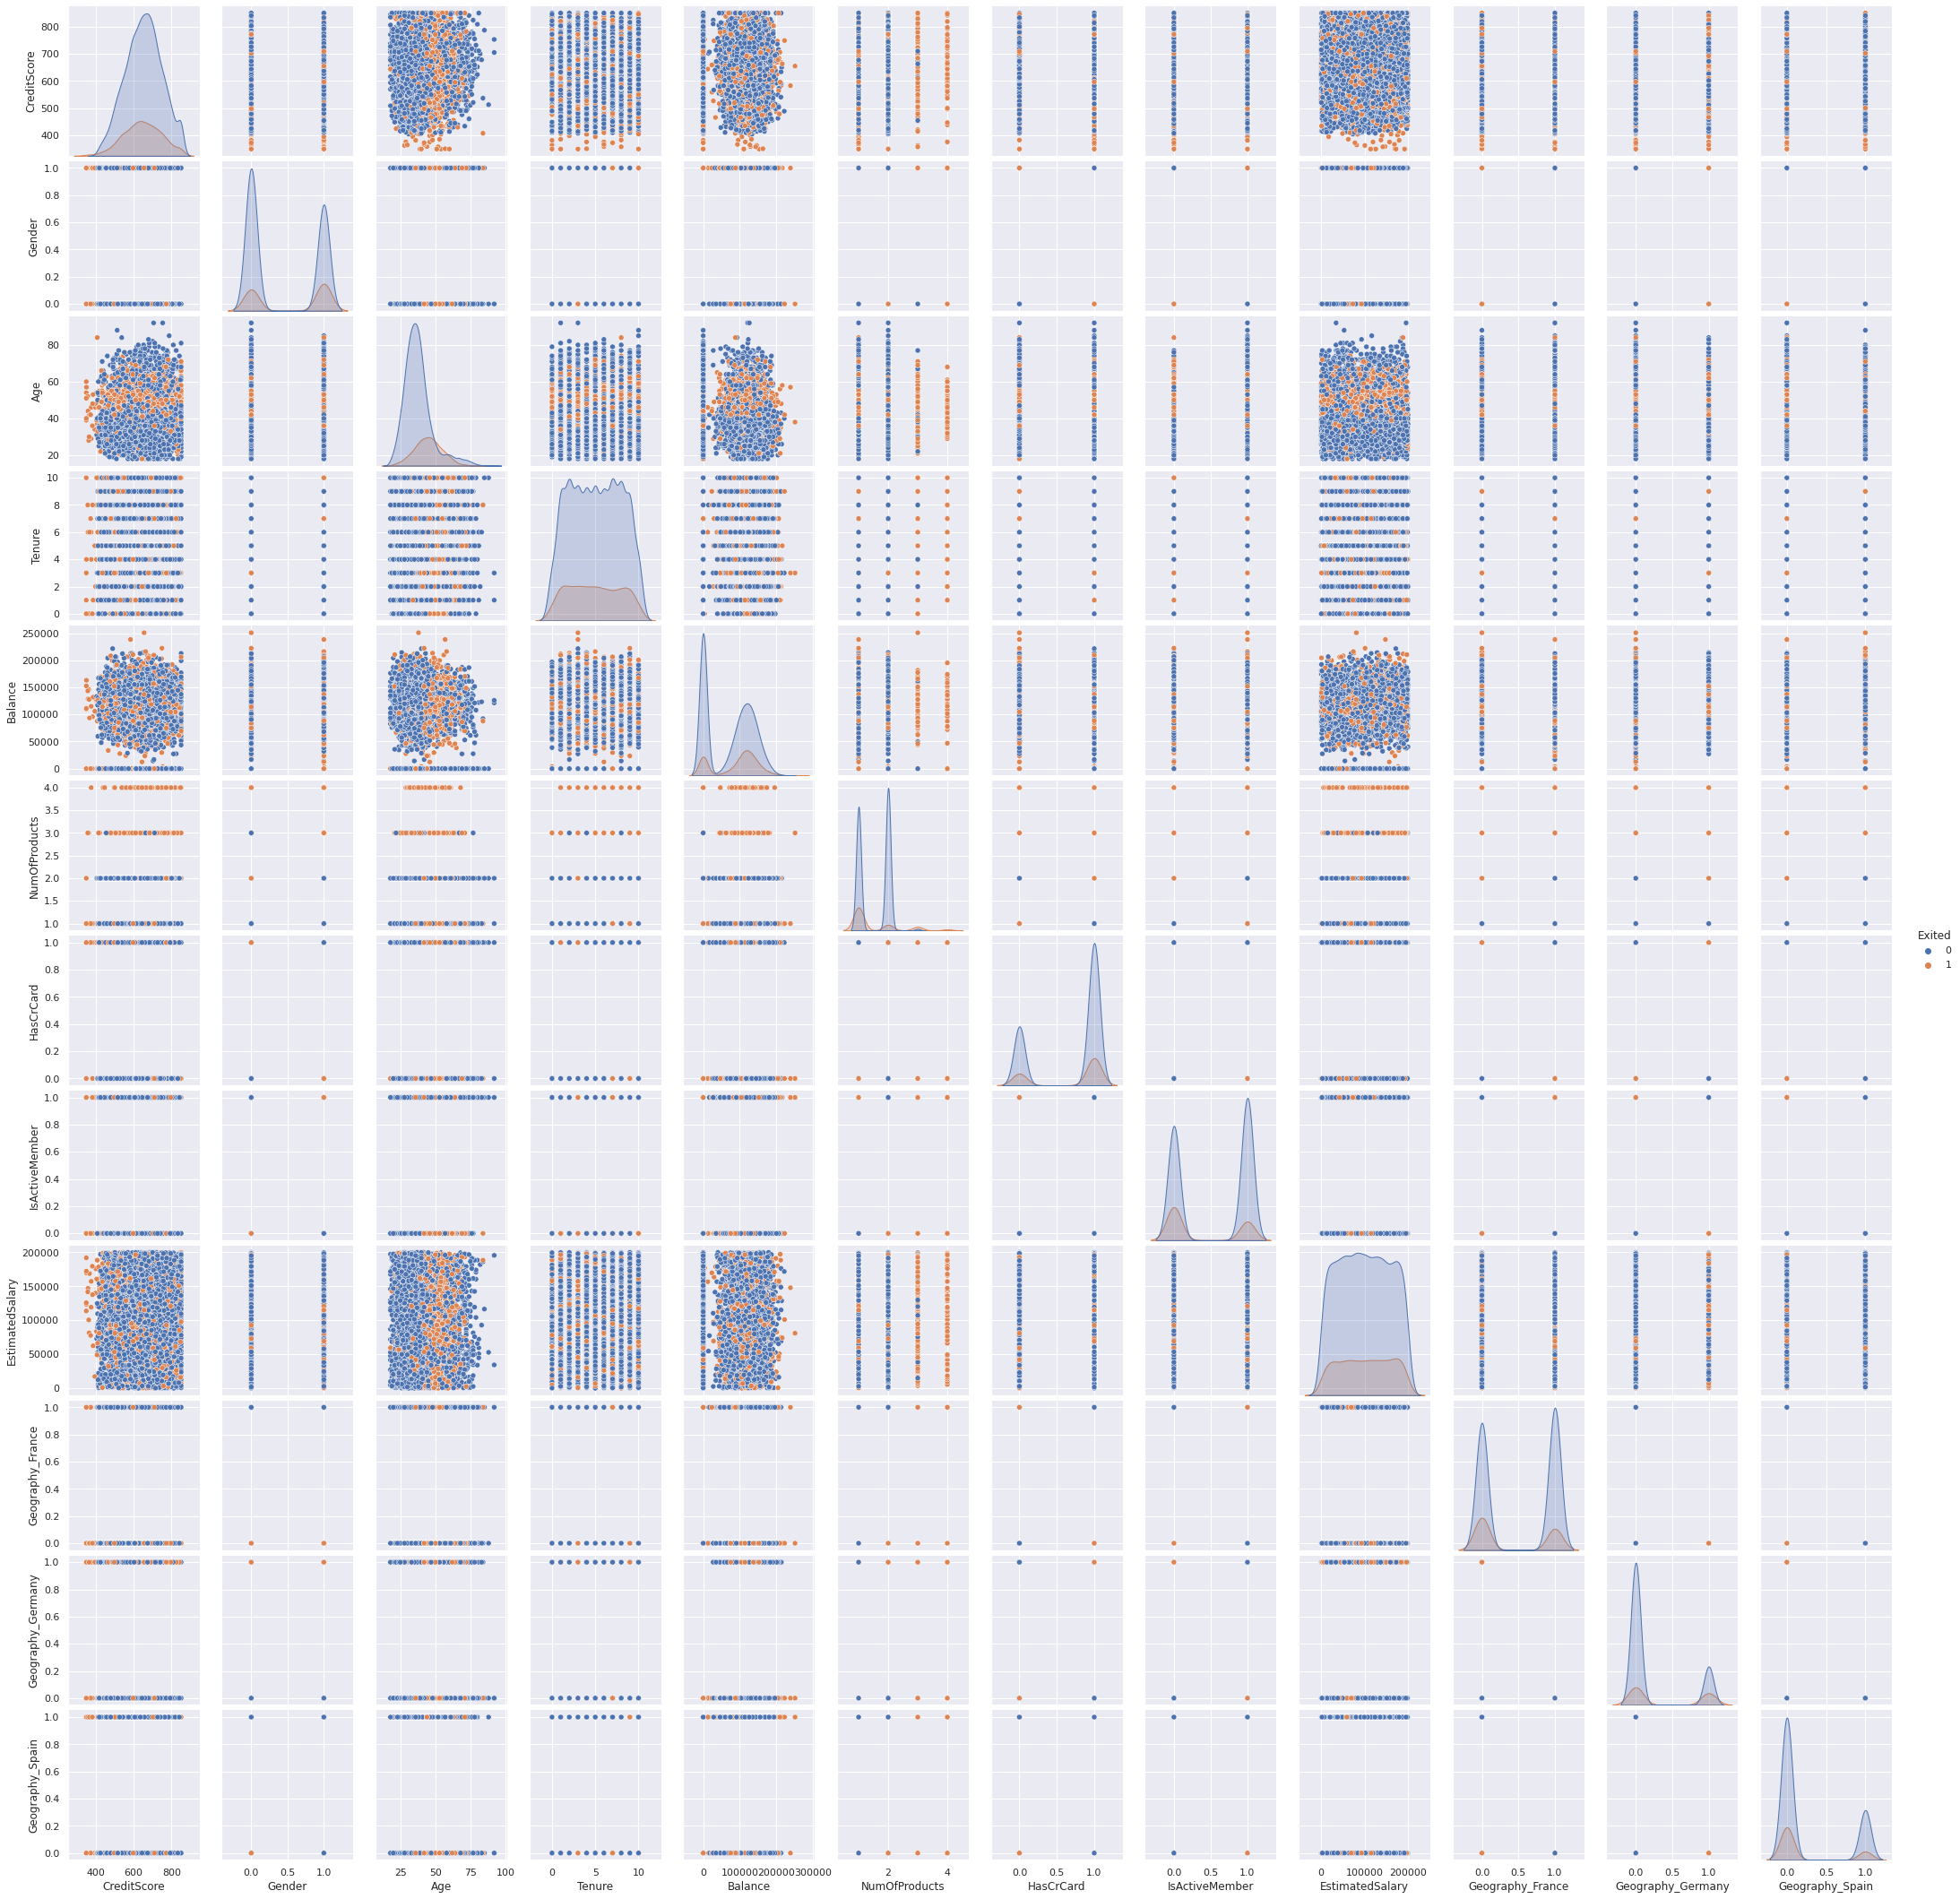

In [15]:
sns.pairplot(df1,hue="Exited")

- In the above pairplot also we can see that the group of people in the middle age between 50 to 75 have exited when compared to the others.
- The people with NumOfProducts greater than 3 are mostly exiting compared to the people with less that 3 products.

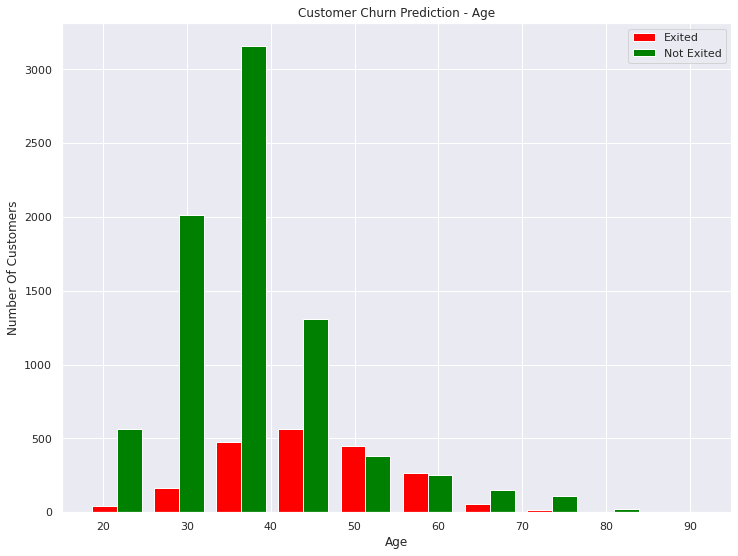

In [16]:
age_exit_no = df1[df1.Exited==0].Age
age_exit_yes = df1[df1.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction - Age")

plt.hist([age_exit_yes, age_exit_no], color = ['red','green'] ,label=['Exited','Not Exited'])
plt.legend()

<BarContainer object of 2 artists>

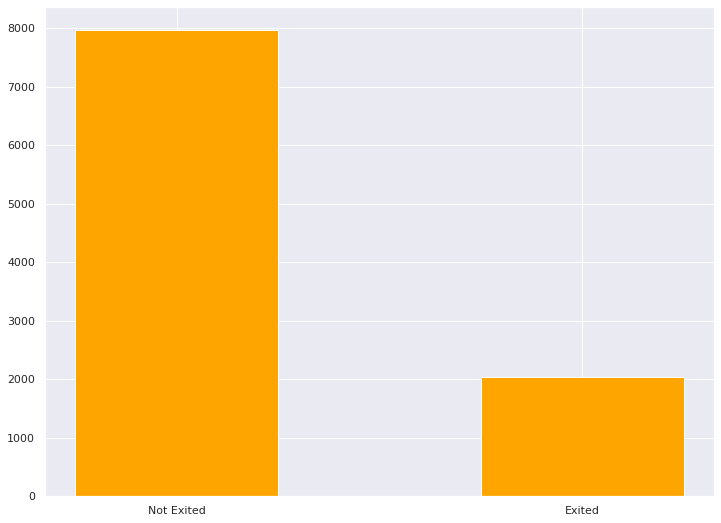

In [17]:
val = df1.Exited.value_counts()
xaxis = ['Not Exited', 'Exited']
plt.bar(xaxis, val, color='orange', width=0.5)

We can see that the dataset is imbalanced as the count of people exited is just 20% of the entire dataset and people who stayed are 80%

### Scaling the columns to get a normalized dataset

In [18]:
cols_to_scale = ['CreditScore','EstimatedSalary','Balance']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [19]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2718,0.876,1,39,3,0.538622,1,0,1,0.565426,0,1,0,0
4531,0.518,0,37,6,0.000000,2,0,1,0.110106,0,1,0,0
7568,0.144,1,54,4,0.000000,2,1,1,0.035779,0,0,0,1
2521,0.576,0,25,4,0.590062,2,1,1,0.573609,0,0,1,0
5224,0.906,0,43,3,0.000000,1,1,0,0.360234,0,0,0,1
3885,0.584,1,56,6,0.411501,2,1,0,0.715259,1,0,1,0
2492,0.340,1,31,3,0.434097,1,1,1,0.917892,1,0,1,0
8606,0.914,0,42,5,0.000000,2,1,1,0.374482,0,0,0,1
2476,0.202,1,38,9,0.245050,1,1,1,0.837715,0,0,1,0
8665,0.942,1,40,1,0.000000,2,1,0,0.971400,0,1,0,0


### Creating the input and output columns and splitting the test and train data

In [20]:
X = df1.drop('Exited', axis = 'columns')
y = df1['Exited']

X.shape, y.shape

((10000, 12), (10000,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((8000, 12), (8000,))

In [22]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 500)

2022-05-19 03:27:14.392087: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-19 03:27:14.621635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
250/250 [==============================] - 1s 3ms/step - loss: 0.5291 - accuracy: 0.7883
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4494 - accuracy: 0.8060
Epoch 3/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4494 - accuracy: 0.8071
Epoch 4/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4434 - accuracy: 0.8090
Epoch 5/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4357 - accuracy: 0.8104
Epoch 6/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8117
Epoch 7/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.8151
Epoch 8/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4295 - accuracy: 0.8164
Epoch 9/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4340 - accuracy: 0.8121
Epoch 10/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4291 - accura

### MODEL EVALUATION

In [23]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8600


[0.3346652090549469, 0.8600000143051147]

### MODEL PREDICTION

In [24]:
y_predicted = model.predict(X_test)
y_predicted[:10]

array([[0.06861836],
       [0.03820339],
       [0.13441476],
       [0.13903746],
       [0.07634538],
       [0.02027032],
       [0.16001001],
       [0.19292954],
       [0.30742636],
       [0.516324  ]], dtype=float32)

In [25]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [26]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [27]:
y_test[:10]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

### CONFUSION MATRIX AND OTHER METRICS

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.72      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Text(66.5, 0.5, 'Truth')

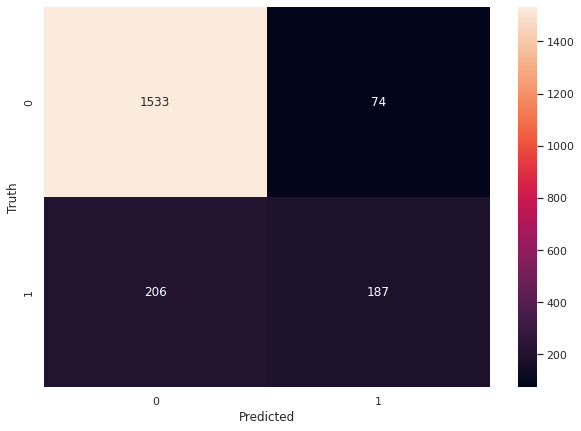

In [29]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

* accuracy = round((1556+182)/(1556+182+51+211),2)
* precision_0 = round(1556/(1556+211),2)
* precision_1 = round(182/(51+182),2)
* recall_0 = round(1556/(1556+51),2)
* recall_1 = round(182/(211+182),2)

# Handling Imbalanced Dataset

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
def logistic_regression_model(X_train, y_train, X_test, y_test, weights):
    if weights==-1:
        model = LogisticRegression(max_iter=1000)
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]},max_iter=1000)

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds\n", y_pred[:5], "\n")
    print("test\n", y_test[:5], "\n")

    classification_report_val = classification_report(y_test,y_pred)
    print(classification_report_val)

In [32]:
weights = -1 # pass -1 to use Logistics Regression without weights
logistic_regression_model(X_train, y_train, X_test, y_test, weights)

Accuracy 0.811 

preds
 [0 0 0 0 0] 

test
 6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## Method1: Undersampling

In [33]:
count_class_0, count_class_1 = df1.Exited.value_counts()

# Divide by class
df_class_0 = df1[df1['Exited'] == 0]
df_class_1 = df1[df1['Exited'] == 1]

In [34]:
count_class_0, count_class_1

(7963, 2037)

In [35]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [36]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [37]:
# Number of classes in training Data
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [38]:
weights = -1 # pass -1 to use Logistics Regression without weights
logistic_regression_model(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7055214723926381 

preds
 [1 0 0 1 0] 

test
 9477    1
9158    0
7096    1
6984    1
623     0
Name: Exited, dtype: int64 

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       408
           1       0.71      0.69      0.70       407

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815



In [39]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
102/102 [==============================] - 1s 2ms/step - loss: 0.7612 - accuracy: 0.5529
Epoch 2/500
102/102 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6505
Epoch 3/500
102/102 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.6797
Epoch 4/500
102/102 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.6867
Epoch 5/500
102/102 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.6971
Epoch 6/500
102/102 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.6886
Epoch 7/500
102/102 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7054
Epoch 8/500
102/102 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.6990
Epoch 9/500
102/102 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.6987
Epoch 10/500
102/102 [==============================] - 0s 2ms/step - loss: 0.5841 - accura

## OverSampling

In [40]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
0    7963
1    7963
Name: Exited, dtype: int64


In [41]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [42]:
# Number of classes in training Data
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [43]:
weights = -1 # pass -1 to use Logistics Regression without weights
logistic_regression_model(X_train, y_train, X_test, y_test, weights)

Accuracy 0.6986817325800376 

preds
 [0 0 1 0 0] 

test
 1327    0
121     0
9975    1
6101    1
3535    0
Name: Exited, dtype: int64 

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1593
           1       0.71      0.68      0.69      1593

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



In [44]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
399/399 [==============================] - 1s 2ms/step - loss: 0.8038 - accuracy: 0.6499
Epoch 2/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5921 - accuracy: 0.6922
Epoch 3/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5921 - accuracy: 0.6924
Epoch 4/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5866 - accuracy: 0.6946
Epoch 5/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5881 - accuracy: 0.6982
Epoch 6/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5913 - accuracy: 0.6947
Epoch 7/500
399/399 [==============================] - 1s 3ms/step - loss: 0.5806 - accuracy: 0.7051
Epoch 8/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5795 - accuracy: 0.7046
Epoch 9/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5761 - accuracy: 0.7074
Epoch 10/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5427 - accura

## SMOTE

In [45]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [48]:
# Number of classes in training Data
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [49]:
weights = -1 # pass -1 to use Logistics Regression without weights
logistic_regression_model(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7507846829880728 

preds
 [0 1 1 0 0] 

test
 1327     0
121      0
6011     1
12164    1
3535     0
Name: Exited, dtype: int64 

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1593
           1       0.75      0.74      0.75      1593

    accuracy                           0.75      3186
   macro avg       0.75      0.75      0.75      3186
weighted avg       0.75      0.75      0.75      3186



In [50]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
399/399 [==============================] - 1s 2ms/step - loss: 0.6477 - accuracy: 0.6678
Epoch 2/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.7257
Epoch 3/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5241 - accuracy: 0.7355
Epoch 4/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.7403
Epoch 5/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5048 - accuracy: 0.7432
Epoch 6/500
399/399 [==============================] - 1s 2ms/step - loss: 0.5048 - accuracy: 0.7460
Epoch 7/500
399/399 [==============================] - 1s 2ms/step - loss: 0.4967 - accuracy: 0.7540
Epoch 8/500
399/399 [==============================] - 1s 2ms/step - loss: 0.4971 - accuracy: 0.7541
Epoch 9/500
399/399 [==============================] - 1s 2ms/step - loss: 0.4953 - accuracy: 0.7519
Epoch 10/500
399/399 [==============================] - 1s 2ms/step - loss: 0.4940 - accura

In [51]:
model.evaluate(X_test,y_test)

100/100 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7643


[0.47140783071517944, 0.7642812132835388]

In [52]:
y_pred_val = model.predict(X_test[0:5])
y_actual_val = y_test[0:5]

## Ensemble Model

In [53]:
# Regain Original features and labels
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [55]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [56]:
model = LogisticRegression()

df2 = X_train.copy()
df2['Exited'] = y_train

In [57]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,0,34,5,0.554265,2,0,0,0.339721,1,0,0,0
3745,0.852,1,37,1,0.371163,2,1,1,0.980432,0,1,0,0
5429,0.664,1,48,7,0.000000,2,1,0,0.325318,1,0,0,0
551,0.648,0,47,6,0.426077,1,1,1,0.010339,0,1,0,1
8967,0.970,0,25,7,0.000000,2,1,1,0.417230,1,0,0,0


In [58]:
df2_class0 = df2[df2.Exited==0]
df2_class1 = df2[df2.Exited==1]

In [59]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train 

In [60]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)

model1 = LogisticRegression(max_iter = 1000)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [61]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1495, 2990)

model2 = LogisticRegression(max_iter = 1000)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [62]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 2990, 4130)

model3 = LogisticRegression(max_iter = 1000)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [63]:
len(y_pred1)

2000

In [64]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [65]:
class_rep = classification_report(y_test, y_pred_final)
print(class_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1593
           1       0.36      0.71      0.47       407

    accuracy                           0.68      2000
   macro avg       0.63      0.69      0.62      2000
weighted avg       0.79      0.68      0.71      2000

